# Final Project
#### Group members: Joseph Naranjo, Jacob Nordstrom, Yumnam Sudipta Devi


# Project Introduction

In this project, we will utilize a financial loan services dataset to conduct a comprehensive analysis and apply machine learning techniques to predict the risk of loan default. This analysis is crucial for companies offering loan services, as it enables them to identify individuals at higher risk of defaulting on their loans and take appropriate preventive measures.

### Project Objectives
1. **Dataset Analysis**: We will explore and preprocess the data to ensure it is ready for modeling.
2. **Model Comparison**: We will train and evaluate various machine learning models, including Logistic Regression, Random Forest, Gradient Boosting, K-Nearest Neighbors, and Voting Classifier.
3. **Hyperparameter Tuning**: We will use hyperparameter tuning techniques to optimize the performance of the selected models.
4. **Implementation of a Functional Model**: Our ultimate goal is to develop a robust and real-world applicable model that can be used by companies to predict loan default risk and make informed decisions.

### Methodology
- **Data Preprocessing**: This includes data cleaning, encoding categorical variables, and standardizing numerical features.
- **Model Training and Evaluation**: We will use cross-validation techniques to evaluate the performance of each model and compare them in terms of accuracy, precision, recall, and F1 Score.
- **Hyperparameter Tuning**: We will apply GridSearchCV to find the best hyperparameters for the selected models.
- **Model Ensembling**: We will combine multiple models using ensembling techniques such as StackingClassifier to further improve performance.

### Expected Outcomes
By the end of this project, we aim to have a highly accurate and reliable machine learning model that can be implemented in real-world scenarios to predict loan default risk. This model will help companies reduce risks and improve efficiency in loan management.

You can find more details about the dataset [here]( https://www.kaggle.com/datasets/nikhil1e9/loan-default?select=Loan_default.csv).


## Data preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Load dataset
df = pd.read_csv('Loan_default.csv') # ('../data/Loan_default.csv')
df.head

<bound method NDFrame.head of             LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56   85994       50587          520              80   
1       HPSK72WA7R   69   50432      124440          458              15   
2       C1OZ6DPJ8Y   46   84208      129188          451              26   
3       V2KKSFM3UN   32   31713       44799          743               0   
4       EY08JDHTZP   60   20437        9139          633               8   
...            ...  ...     ...         ...          ...             ...   
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio 

In [4]:
# Check the data types of the columns
print(df.dtypes)

# Select columns with numerical data types
numeric_df = df.select_dtypes(include=[np.number])

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object


In [5]:
# Check null values
null_values = df.isnull().sum()
print(f"Null values: \n{null_values}") # No null values

# Check duplicates values
duplicates = df.duplicated().sum()
print(f"\nDuplicates values: {duplicates}") # No duplicates

Null values: 
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Duplicates values: 0


In [6]:
# Apply Label Encoding to each categorical column
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,128027,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,125442,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,85333,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,220129,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,105746,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [7]:
# Select the relevant numeric columns for standardization
numeric_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Apply StandardScaler to only selected numeric features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Show Table
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,128027,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0
1,125442,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0
2,85333,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1
3,220129,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0
4,105746,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0


In [8]:
# Define the input characteristics (X) and the target variable (y)
X = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']]
y = df['Default']

In [9]:
# Select the relevant numeric columns for outlier detection
numeric_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Detect outliers by excluding categorical and binary columns
Q1 = X[numeric_columns].quantile(0.25)
Q3 = X[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = X[((X[numeric_columns] < (Q1 - 1.5 * IQR)) | (X[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Number of outliers detected: {outliers.shape[0]}")

# Remove outliers by excluding categorical and binary columns
X_cleaned = X[~((X[numeric_columns] < (Q1 - 1.5 * IQR)) | (X[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
y_cleaned = y[X_cleaned.index]

print(f"Number of rows after removing outliers: {X_cleaned.shape[0]}")
print(f"Distribution of 'Default' after removing outliers:\n{y_cleaned.value_counts()}")

# Show Table
df.head()

Number of outliers detected: 0
Number of rows after removing outliers: 255347
Distribution of 'Default' after removing outliers:
Default
0    225694
1     29653
Name: count, dtype: int64


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,128027,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0
1,125442,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0
2,85333,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1
3,220129,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0
4,105746,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0


## Visualize the Data

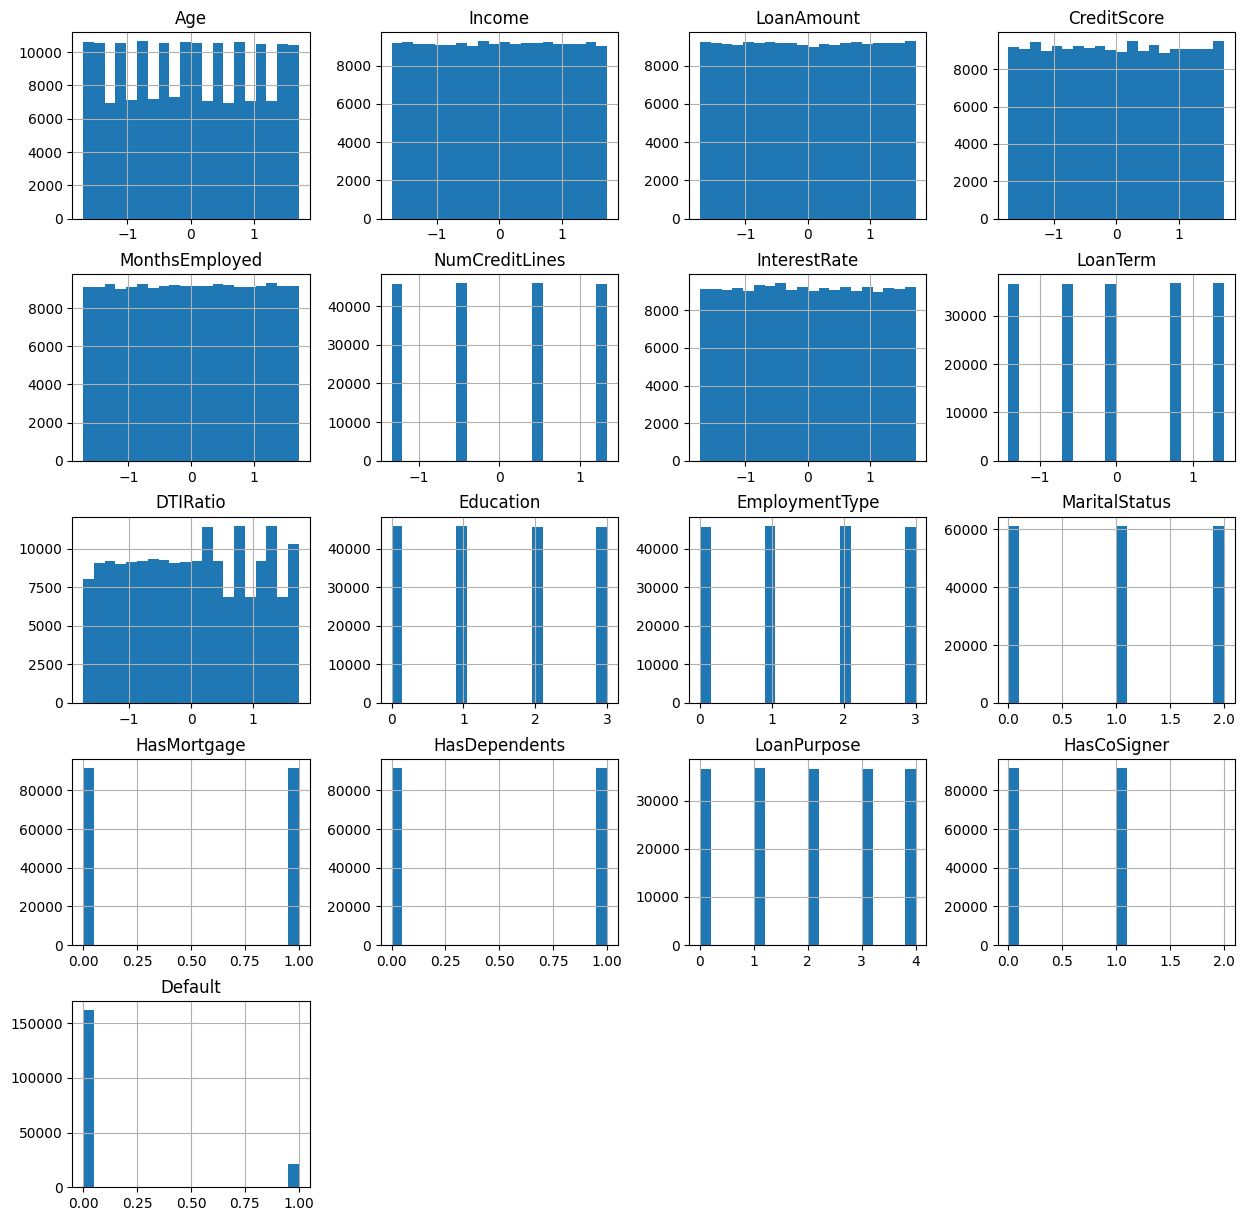

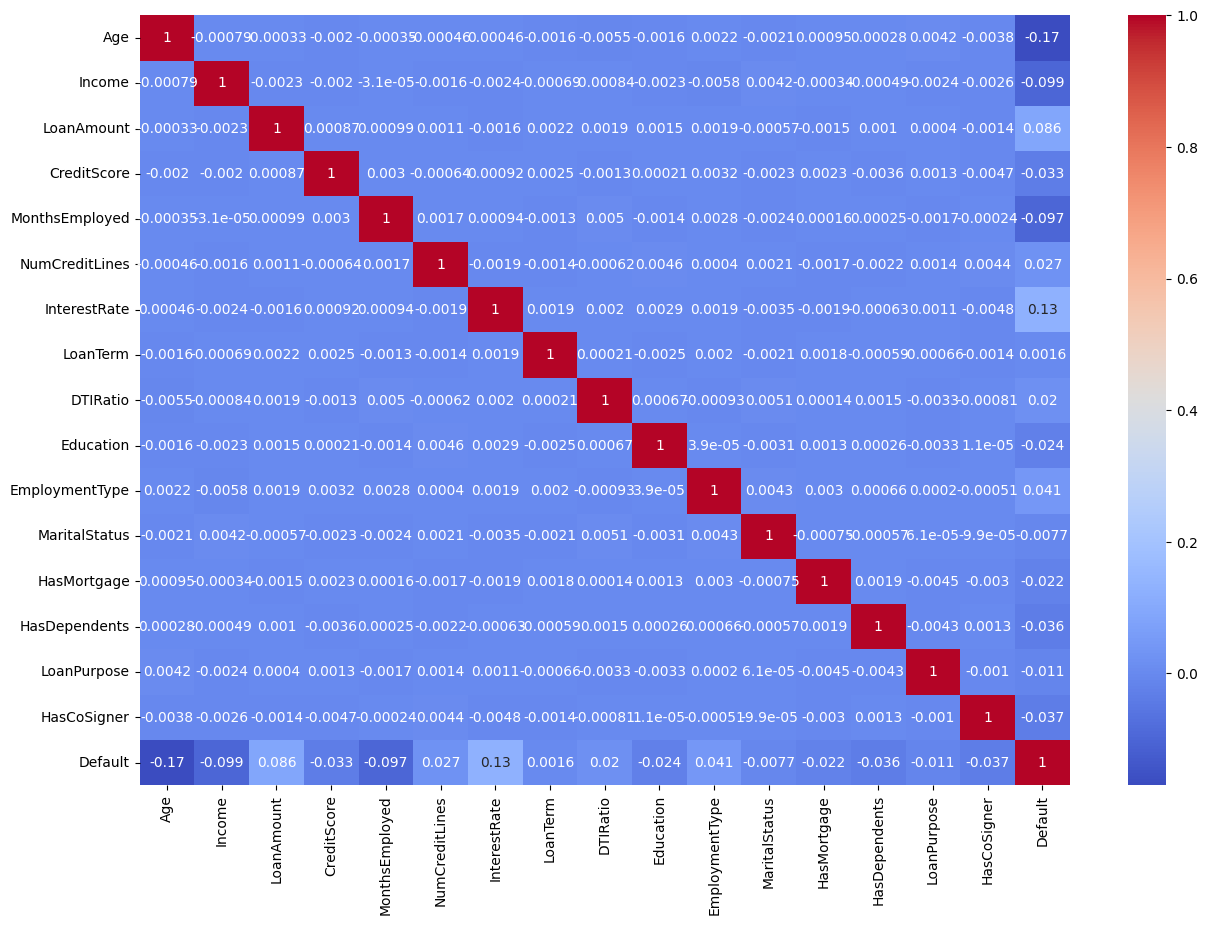

In [ ]:
# Exclude LoanID column
df_no_loanid = df.drop(columns=['LoanID'])

# Plot histograms
df_no_loanid.hist(bins=20, figsize=(15, 15))
plt.show()

# Plot correlation matrix
corr = df_no_loanid.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Model Selection and Building:


In [10]:
 # Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [12]:
# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Validate the model
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('Precision:', precision_score(y_test, y_pred_log_reg))
print('Recall:', recall_score(y_test, y_pred_log_reg))
print('F1 Score:', f1_score(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy: 0.8858821225768553
Precision: 0.6216216216216216
Recall: 0.031186440677966103
F1 Score: 0.05939315687540349


## Logistic Regression With Hyperparameter Tuning

In [13]:
# Defining the hyperparameter search space
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5, scoring='precision')
grid_search_log_reg.fit(X_train, y_train)

# Get the best model
best_log_reg = grid_search_log_reg.best_estimator_

# Validate the best model
y_pred_best_log_reg = best_log_reg.predict(X_test)
print('Best Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_best_log_reg))
print('Precision:', precision_score(y_test, y_pred_best_log_reg))
print('Recall:', recall_score(y_test, y_pred_best_log_reg))
print('F1 Score:', f1_score(y_test, y_pred_best_log_reg))

Best Logistic Regression:
Accuracy: 0.885549246132759
Precision: 0.611336032388664
Recall: 0.02559322033898305
F1 Score: 0.04912965674312673


## Random Forest

In [14]:
# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Validate the model
y_pred_rf = rf.predict(X_test)
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.8868024280399451
Precision: 0.6307692307692307
Recall: 0.04864406779661017
F1 Score: 0.09032258064516129


## Random Forest With Hyperparameter Tuning

In [15]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='precision', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf = random_search_rf.best_estimator_

# Validar el mejor modelo
y_pred_best_rf = best_rf.predict(X_test)
print('Best Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_best_rf))
print('Precision:', precision_score(y_test, y_pred_best_rf))
print('Recall:', recall_score(y_test, y_pred_best_rf))
print('F1 Score:', f1_score(y_test, y_pred_best_rf))

Best Random Forest:
Accuracy: 0.8860779322498531
Precision: 0.7135416666666666
Recall: 0.02322033898305085
F1 Score: 0.04497701904136572


# GradientBoost

In [16]:
# Train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Validate the model
y_pred_gb = gb.predict(X_test)
print('Gradient Boosting:')
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Precision:', precision_score(y_test, y_pred_gb))
print('Recall:', recall_score(y_test, y_pred_gb))
print('F1 Score:', f1_score(y_test, y_pred_gb))

Gradient Boosting:
Accuracy: 0.8873115331897395
Precision: 0.6565874730021598
Recall: 0.05152542372881356
F1 Score: 0.09555241238409555


## Gradient Boosting With Hyperparameter Tuning

In [17]:
# Defining the hyperparameter search space
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions=param_grid_gb, n_iter=10, cv=5, scoring='precision', random_state=42, n_jobs=-1)
random_search_gb.fit(X_train, y_train)

# Get the best model
best_gb = random_search_gb.best_estimator_

# Validate the best model
y_pred_best_gb = best_gb.predict(X_test)
print('Best Gradient Boosting:')
print('Accuracy:', accuracy_score(y_test, y_pred_best_gb))
print('Precision:', precision_score(y_test, y_pred_best_gb))
print('Recall:', recall_score(y_test, y_pred_best_gb))
print('F1 Score:', f1_score(y_test, y_pred_best_gb))

Best Gradient Boosting:
Accuracy: 0.8874681809281378
Precision: 0.6032388663967612
Recall: 0.07576271186440678
F1 Score: 0.13461828037946091


## KNN

In [18]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos (k) según sea necesario
knn.fit(X_train, y_train)

# Validate the model
y_pred_knn = knn.predict(X_test)
print('K-Nearest Neighbors:')
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))
print('F1 Score:', f1_score(y_test, y_pred_knn))

K-Nearest Neighbors:
Accuracy: 0.8748580379870765
Precision: 0.3242662848962062
Recall: 0.07677966101694915
F1 Score: 0.12416061395093875


## KNN With Hyperparameter Tuning

In [11]:
# Defining the hyperparameter search space
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create the RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=10, cv=5, scoring='precision', random_state=42, n_jobs=-1)
random_search_knn.fit(X_train, y_train)

# Get the best model
best_knn = random_search_knn.best_estimator_

# Validate the best model
y_pred_best_knn = best_knn.predict(X_test)
print('Best K-Nearest Neighbors:')
print('Accuracy:', accuracy_score(y_test, y_pred_best_knn))
print('Precision:', precision_score(y_test, y_pred_best_knn))
print('Recall:', recall_score(y_test, y_pred_best_knn))
print('F1 Score:', f1_score(y_test, y_pred_best_knn))

Best K-Nearest Neighbors:
Accuracy: 0.8834149206970824
Precision: 0.4448979591836735
Recall: 0.03694915254237288
F1 Score: 0.06823161189358372


## VotingClassifier

In [19]:
# Defining the base models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('gb', gb),
    ('knn', knn)
], voting='soft')

# Training the voting classifier
voting_clf.fit(X_train, y_train)

# Validate the voting classifier
y_pred_voting = voting_clf.predict(X_test)
print('Voting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_voting))
print('Precision:', precision_score(y_test, y_pred_voting))
print('Recall:', recall_score(y_test, y_pred_voting))
print('F1 Score:', f1_score(y_test, y_pred_voting))

Voting Classifier:
Accuracy: 0.8859996083806541
Precision: 0.6291390728476821
Recall: 0.03220338983050847
F1 Score: 0.06127055788455337


## Voting Classifieir With Hyperparameter Tuning

In [20]:
# Defining the base models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('gb', gb),
    ('knn', knn)
], voting='soft')

# Defining the hyperparameter search space
param_grid_voting = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'knn__n_neighbors': [3, 5, 7]
}

# Create the RandomizedSearchCV
random_search_voting = RandomizedSearchCV(estimator=voting_clf, param_distributions=param_grid_voting, n_iter=10, cv=5, scoring='precision', random_state=42, n_jobs=-1)
random_search_voting.fit(X_train, y_train)

# Get the best model
best_voting_clf = random_search_voting.best_estimator_

# Validate the best model
y_pred_best_voting = best_voting_clf.predict(X_test)
print('Best Voting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_best_voting))
print('Precision:', precision_score(y_test, y_pred_best_voting))
print('Recall:', recall_score(y_test, y_pred_best_voting))
print('F1 Score:', f1_score(y_test, y_pred_best_voting))

Best Voting Classifier:
Accuracy: 0.8848834932445663
Precision: 0.7560975609756098
Recall: 0.005254237288135594
F1 Score: 0.01043595354317455


## StackingClassifier

In [21]:
# Defining the base models
estimators = [
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Creating the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

# Validating the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test)
print('Stacking Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_stacking))
print('Precision:', precision_score(y_test, y_pred_stacking))
print('Recall:', recall_score(y_test, y_pred_stacking))
print('F1 Score:', f1_score(y_test, y_pred_stacking))

Stacking Classifier:
Accuracy: 0.8869394948110436
Precision: 0.5622529644268774
Recall: 0.0964406779661017
F1 Score: 0.1646412037037037


## StackingClassifier With Hyperparameter Tuning

In [22]:
# Defining the base models
estimators = [
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier())
]

# Creating the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Defining the hyperparameter search space
param_grid_stacking = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'knn__n_neighbors': [3, 5, 7],
    'final_estimator__C': [0.01, 0.1, 1, 10, 100]
}

# Create the RandomizedSearchCV
random_search_stacking = RandomizedSearchCV(estimator=stacking_clf, param_distributions=param_grid_stacking, n_iter=10, cv=5, scoring='precision', random_state=42, n_jobs=-1)
random_search_stacking.fit(X_train, y_train)

# Get the best model
best_stacking_clf = random_search_stacking.best_estimator_

# Validate the best model
y_pred_best_stacking = best_stacking_clf.predict(X_test)
print('Best Stacking Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_best_stacking))
print('Precision:', precision_score(y_test, y_pred_best_stacking))
print('Recall:', recall_score(y_test, y_pred_best_stacking))
print('F1 Score:', f1_score(y_test, y_pred_best_stacking))

Best Stacking Classifier:
Accuracy: 0.887546504797337
Precision: 0.6045272969374168
Recall: 0.07694915254237288
F1 Score: 0.13652082393625017


# Model Evaluation and Validation

In [24]:
# Model results
results = {
    'Model': ['Logistic Regression',
              'Best Logistic Regression',
              'Random Forest',
              'Best Random Forest',
              'Gradient Boosting',
              'Best Gradient Boosting',
              'K-Nearest Neighbors',
              'Best K-Nearest Neighbors',
              'Voting Classifier',
              'Best Voting Classifier',
              'Stacking Classifier',
              'Best Stacking Classifier'],
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg),
                 accuracy_score(y_test, y_pred_best_log_reg),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_best_rf),
                 accuracy_score(y_test, y_pred_gb),
                 accuracy_score(y_test, y_pred_best_gb),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_best_knn),
                 accuracy_score(y_test, y_pred_voting),
                 accuracy_score(y_test, y_pred_best_voting),
                 accuracy_score(y_test, y_pred_stacking),
                 accuracy_score(y_test, y_pred_best_stacking)],
    'Precision': [precision_score(y_test, y_pred_log_reg),
                  precision_score(y_test, y_pred_best_log_reg),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_best_rf),
                  precision_score(y_test, y_pred_gb),
                  precision_score(y_test, y_pred_best_gb),
                  precision_score(y_test, y_pred_knn),
                  precision_score(y_test, y_pred_best_knn),
                  precision_score(y_test, y_pred_voting),
                  precision_score(y_test, y_pred_best_voting),
                  precision_score(y_test, y_pred_stacking),
                  precision_score(y_test, y_pred_best_stacking)],
    'Recall': [recall_score(y_test, y_pred_log_reg),
               recall_score(y_test, y_pred_best_log_reg),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_best_rf),
               recall_score(y_test, y_pred_gb),
               recall_score(y_test, y_pred_best_gb),
               recall_score(y_test, y_pred_knn),
               recall_score(y_test, y_pred_best_knn),
               recall_score(y_test, y_pred_voting),
               recall_score(y_test, y_pred_best_voting),
               recall_score(y_test, y_pred_stacking),
               recall_score(y_test, y_pred_best_stacking)],
    'F1 Score': [f1_score(y_test, y_pred_log_reg),
                 f1_score(y_test, y_pred_best_log_reg),
                 f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_best_rf),
                 f1_score(y_test, y_pred_gb),
                 f1_score(y_test, y_pred_best_gb),
                 f1_score(y_test, y_pred_knn),
                 f1_score(y_test, y_pred_best_knn),
                 f1_score(y_test, y_pred_voting),
                 f1_score(y_test, y_pred_best_voting),
                 f1_score(y_test, y_pred_stacking),
                 f1_score(y_test, y_pred_best_stacking)]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Finding the best model for each metric
best_accuracy = results_df.loc[results_df['Accuracy'].idxmax()]
best_precision = results_df.loc[results_df['Precision'].idxmax()]
best_recall = results_df.loc[results_df['Recall'].idxmax()]
best_f1 = results_df.loc[results_df['F1 Score'].idxmax()]

# Print the results
print("Best model by metric:")
print(f"Best Accuracy: {best_accuracy['Model']} con {best_accuracy['Accuracy']}")
print(f"Best Precision: {best_precision['Model']} con {best_precision['Precision']}")
print(f"Best Recall: {best_recall['Model']} con {best_recall['Recall']}")
print(f"Best F1 Score: {best_f1['Model']} con {best_f1['F1 Score']}")

# Show results table
print("\nFull results:")
print(results_df)

Best model by metric:
Best Accuracy: Best Stacking Classifier con 0.887546504797337
Best Precision: Best Voting Classifier con 0.7560975609756098
Best Recall: Stacking Classifier con 0.0964406779661017
Best F1 Score: Stacking Classifier con 0.1646412037037037

Full results:
                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.885882   0.621622  0.031186  0.059393
1   Best Logistic Regression  0.885549   0.611336  0.025593  0.049130
2              Random Forest  0.886802   0.630769  0.048644  0.090323
3         Best Random Forest  0.886078   0.713542  0.023220  0.044977
4          Gradient Boosting  0.887312   0.656587  0.051525  0.095552
5     Best Gradient Boosting  0.887468   0.603239  0.075763  0.134618
6        K-Nearest Neighbors  0.874858   0.324266  0.076780  0.124161
7   Best K-Nearest Neighbors  0.883415   0.444898  0.036949  0.068232
8          Voting Classifier  0.886000   0.629139  0.032203  0.061271
9     Best Voting Classif

In [26]:
# Generate the model file
import joblib

joblib.dump(best_stacking_clf, 'stacking_classifier_random_search.pkl') #(best_stacking_clf, 'models/stacking_classifier_hyperparameters_random_search.pkl')

['stacking_classifier_random_search.pkl']

## Conclusion

Based on the analysis of the results, the **Best Stacking Classifier** with hyperparameters is the most suitable option for predicting loan default risk in a real-world environment. Here are the key reasons:

### Conclusion

1. **Balanced Performance**: The Best Stacking Classifier demonstrates a balanced performance across multiple metrics. It has the highest accuracy (0.887547), indicating that it correctly predicts the majority of cases. Additionally, it has a good F1 Score (0.136521), which balances precision and recall, making it a reliable choice for identifying both true positives and minimizing false positives.

2. **High Accuracy**: With an accuracy of 0.887547, the Best Stacking Classifier is the most accurate model among all the tested models. This high accuracy ensures that the model performs well in general, making it a robust choice for practical applications.

3. **Good Precision and Recall**: Although the Best Voting Classifier has the highest precision (0.756098), the Best Stacking Classifier offers a good balance between precision (0.604527) and recall (0.076949). This balance is crucial in a real-world scenario where both minimizing false positives and identifying true positives are important.

4. **Versatility**: The Stacking Classifier leverages the strengths of multiple base models (Gradient Boosting, Random Forest, Logistic Regression, and K-Nearest Neighbors) and combines them with a final estimator (Logistic Regression). This ensemble approach enhances the model's ability to generalize and perform well on diverse data.

### Practical Application

In a real-world environment, the Best Stacking Classifier's balanced performance and high accuracy make it a reliable and effective tool for predicting loan default risk. By using this model, financial institutions can make informed decisions, reduce risks, and improve efficiency in loan management.

Overall, the Best Stacking Classifier with hyperparameters is the optimal choice for practical implementation due to its robust and balanced performance across key metrics.